In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.eval_measures import aic, bic
from sklearn.metrics import r2_score
import patsy

df_90s = pd.read_csv('../data/results/07052025_segment_data_t123_90s_1s.csv')
df_10s_10s = pd.read_csv('../data/results/07052025_segment_data_t123_10s_10s.csv')
df_10s_1s = pd.read_csv('../data/results/07052025_segment_data_t123_10s_1s.csv')
df_20s_1s = pd.read_csv('../data/results/07052025_segment_data_t123_20s_1s.csv')
df_30s_1s = pd.read_csv('../data/results/07052025_segment_data_t123_30s_1s.csv')
df_30s_30s = pd.read_csv('../data/results/07052025_segment_data_t123_30s_30s.csv')
df_20s_10s = pd.read_csv('../data/results/07052025_segment_data_t123_20s_10s.csv')
df_60s_1s = pd.read_csv('../data/results/07052025_segment_data_t123_60s_1s.csv')

# Example: Load datasets
df_90s['segmentation'] = '90s_1s'
df_10s_10s['segmentation'] = '10s_10s'
df_10s_1s['segmentation'] = '10s_1s'
df_20s_1s['segmentation'] = '20s_1s'
df_30s_30s['segmentation'] = '30s_30s'
df_30s_1s['segmentation'] = '30s_1s'
df_20s_10s['segmentation'] = '20s_10s'
df_60s_1s['segmentation'] = '60s_1s'

df_all = pd.concat([df_90s, df_10s_10s, df_10s_1s, df_20s_1s, df_30s_30s, df_30s_1s, df_20s_10s, df_60s_1s], ignore_index=True)

In [2]:
df_all

,participant_id,session,trial,version,segment,center_dist,edge_dist,speed,acceleration,stops_count,stops_duration,max_distance,area_covered,rmssd,hr,safe_area_coverage,unsafe_area_coverage,segmentation
0,845,1,7,1,0,1.943136,0.651947,0.308236,0.338083,4,9.2665,5.435118,13.395730,18.375245,79.244491,NaN,NaN,90s_1s
1,845,1,11,1,0,1.475258,0.338362,0.157036,0.039477,16,32.8627,3.763231,0.000000,19.761502,77.465935,28.792028,15.315010,90s_1s
2,845,1,15,1,0,2.405814,0.738039,0.210210,0.248496,13,22.6564,6.853559,11.937595,18.375245,79.244491,NaN,NaN,90s_1s
3,478,2,7,1,0,2.146072,0.381385,0.244542,0.327021,9,49.4030,4.875850,11.293606,25.857307,78.811040,NaN,NaN,90s_1s
4,478,2,11,1,0,1.183441,0.461657,0.204686,0.054305,16,25.7089,3.886897,0.002830,26.248676,79.894208,52.096150,8.192195,90s_1s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,851,1,15,1,26,2.134204,0.370883,0.305910,0.157064,7,9.3660,6.399119,11.024383,38.496131,67.183705,NaN,NaN,60s_1s
9536,851,1,15,1,27,2.114861,0.352541,0.310978,0.158747,7,9.3660,6.116421,11.291815,37.445831,67.289133,NaN,NaN,60s_1s
9537,851,1,15,1,28,2.093809,0.343967,0.317469,0.154777,7,9.3660,5.970818,11.595028,36.351219,67.368421,NaN,NaN,60s_1s
9538,851,1,15,1,29,2.072891,0.341423,0.325909,0.162593,7,9.3660,5.872187,11.953537,36.377041,67.511987,NaN,NaN,60s_1s


In [3]:
df_all = df_all.drop(columns=['segment','version'])

In [4]:
scene_map = {7: 'empty_room', 11: 'elevated_platform', 15: 'dark_maze'}
df_all['scene'] = df_all['trial'].map(scene_map)

In [5]:
for seg in df_all['segmentation'].unique():
    for scene in df_all['scene'].unique():
        subset = df_all[(df_all['segmentation'] == seg) & (df_all['scene'] == scene)]
        corr = subset.corr(numeric_only=True)
        print(f"Correlation matrix for {seg}, {scene}:\n", corr['rmssd'].sort_values())

Correlation matrix for 90s_1s, empty_room:
 hr                     -0.770221
edge_dist              -0.678218
area_covered           -0.496820
speed                  -0.439828
session                -0.300043
max_distance           -0.280181
participant_id          0.007776
center_dist             0.020605
stops_duration          0.064067
acceleration            0.104284
stops_count             0.577333
rmssd                   1.000000
trial                        NaN
safe_area_coverage           NaN
unsafe_area_coverage         NaN
Name: rmssd, dtype: float64
Correlation matrix for 90s_1s, elevated_platform:
 hr                     -0.793335
session                -0.457677
unsafe_area_coverage   -0.256038
stops_duration         -0.086214
speed                  -0.070708
stops_count            -0.020249
center_dist            -0.014017
edge_dist               0.033635
participant_id          0.118233
safe_area_coverage      0.128035
area_covered            0.197424
max_distance       

mixed model with rmssd

In [6]:
import statsmodels.formula.api as smf

model = smf.mixedlm("rmssd ~ speed + acceleration + stops_count + edge_dist + center_dist + max_distance + area_covered + scene*segmentation",
                    data=df_all, 
                    groups=df_all["participant_id"])
result = model.fit()
print(result.summary())

                             Mixed Linear Model Regression Results
Model:                          MixedLM             Dependent Variable:             rmssd      
No. Observations:               9540                Method:                         REML       
No. Groups:                     12                  Scale:                          77.2533    
Min. group size:                795                 Log-Likelihood:                 -34292.5473
Max. group size:                795                 Converged:                      Yes        
Mean group size:                795.0                                                          
-----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------------------------
Intercept                                           28.164    3.504  

In [7]:
import statsmodels.formula.api as smf

model = smf.mixedlm("rmssd ~ speed + acceleration + stops_count + edge_dist + center_dist + max_distance + area_covered + scene*segmentation",
                    data=df_all, 
                    groups=df_all["participant_id"])
result = model.fit()
print(result.summary())

                             Mixed Linear Model Regression Results
Model:                          MixedLM             Dependent Variable:             rmssd      
No. Observations:               9540                Method:                         REML       
No. Groups:                     12                  Scale:                          77.2533    
Min. group size:                795                 Log-Likelihood:                 -34292.5473
Max. group size:                795                 Converged:                      Yes        
Mean group size:                795.0                                                          
-----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------------------------
Intercept                                           28.164    3.504  

In [8]:
import statsmodels.formula.api as smf

model = smf.mixedlm("hr ~ speed + acceleration + stops_count + area_covered + scene*segmentation",
                    data=df_all, 
                    groups=df_all["participant_id"])
result = model.fit()
print(result.summary())

                             Mixed Linear Model Regression Results
Model:                          MixedLM             Dependent Variable:             hr         
No. Observations:               9540                Method:                         REML       
No. Groups:                     12                  Scale:                          14.6305    
Min. group size:                795                 Log-Likelihood:                 -26389.4075
Max. group size:                795                 Converged:                      Yes        
Mean group size:                795.0                                                          
-----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------
Intercept                                           80.280    4.021  

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_all['scene_enc'] = LabelEncoder().fit_transform(df_all['scene'])
df_all['segmentation_enc'] = LabelEncoder().fit_transform(df_all['segmentation'])

features = ['speed', 'acceleration', 'stops_count', 'area_covered',            
           'center_dist', 'edge_dist', 'max_distance', 'safe_area_coverage', 'unsafe_area_coverage',
              'scene_enc',  'segmentation_enc']
target = 'rmssd'

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_all[features], df_all[target])
importances = pd.Series(rf.feature_importances_, index=features)
print(importances.sort_values(ascending=False))

acceleration            0.323612
speed                   0.171747
edge_dist               0.102339
area_covered            0.087974
center_dist             0.086684
max_distance            0.064532
stops_count             0.061515
unsafe_area_coverage    0.039960
scene_enc               0.037629
safe_area_coverage      0.016920
segmentation_enc        0.007089
dtype: float64


In [10]:
df_all

,participant_id,session,trial,center_dist,edge_dist,speed,acceleration,stops_count,stops_duration,max_distance,area_covered,rmssd,hr,safe_area_coverage,unsafe_area_coverage,segmentation,scene,scene_enc,segmentation_enc
0,845,1,7,1.943136,0.651947,0.308236,0.338083,4,9.2665,5.435118,13.395730,18.375245,79.244491,NaN,NaN,90s_1s,empty_room,2,7
1,845,1,11,1.475258,0.338362,0.157036,0.039477,16,32.8627,3.763231,0.000000,19.761502,77.465935,28.792028,15.315010,90s_1s,elevated_platform,1,7
2,845,1,15,2.405814,0.738039,0.210210,0.248496,13,22.6564,6.853559,11.937595,18.375245,79.244491,NaN,NaN,90s_1s,dark_maze,0,7
3,478,2,7,2.146072,0.381385,0.244542,0.327021,9,49.4030,4.875850,11.293606,25.857307,78.811040,NaN,NaN,90s_1s,empty_room,2,7
4,478,2,11,1.183441,0.461657,0.204686,0.054305,16,25.7089,3.886897,0.002830,26.248676,79.894208,52.096150,8.192195,90s_1s,elevated_platform,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,851,1,15,2.134204,0.370883,0.305910,0.157064,7,9.3660,6.399119,11.024383,38.496131,67.183705,NaN,NaN,60s_1s,dark_maze,0,6
9536,851,1,15,2.114861,0.352541,0.310978,0.158747,7,9.3660,6.116421,11.291815,37.445831,67.289133,NaN,NaN,60s_1s,dark_maze,0,6
9537,851,1,15,2.093809,0.343967,0.317469,0.154777,7,9.3660,5.970818,11.595028,36.351219,67.368421,NaN,NaN,60s_1s,dark_maze,0,6
9538,851,1,15,2.072891,0.341423,0.325909,0.162593,7,9.3660,5.872187,11.953537,36.377041,67.511987,NaN,NaN,60s_1s,dark_maze,0,6


In [11]:
df_all['scene_enc'] = LabelEncoder().fit_transform(df_all['scene'])
df_all['segmentation_enc'] = LabelEncoder().fit_transform(df_all['segmentation'])

features = ['speed', 'acceleration', 'stops_count', 'area_covered',            
           'center_dist', 'edge_dist', 'max_distance', 'safe_area_coverage', 'unsafe_area_coverage',
  #            'scene_enc',  'segmentation_enc'
              ]
target = 'rmssd'
for segment in df_all['segmentation'].unique():
    df_segment = df_all[df_all['segmentation'] == segment]
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(df_segment[features], df_segment[target])
    importances = pd.Series(rf.feature_importances_, index=features)
    print(f"{segment}\n{importances.sort_values(ascending=False)}")


90s_1s
acceleration            0.482891
stops_count             0.140367
edge_dist               0.083650
speed                   0.079698
area_covered            0.057554
unsafe_area_coverage    0.053100
max_distance            0.046963
center_dist             0.032526
safe_area_coverage      0.023251
dtype: float64
10s_10s
acceleration            0.250187
max_distance            0.141502
area_covered            0.137343
center_dist             0.134985
edge_dist               0.134794
speed                   0.097414
unsafe_area_coverage    0.049754
safe_area_coverage      0.028460
stops_count             0.025561
dtype: float64
10s_1s
acceleration            0.276907
edge_dist               0.161697
area_covered            0.151268
center_dist             0.132262
speed                   0.089178
max_distance            0.081744
unsafe_area_coverage    0.049219
stops_count             0.040297
safe_area_coverage      0.017429
dtype: float64
20s_1s
acceleration            0.368433
ar


SHAP Summary Plot for: 90s_1s


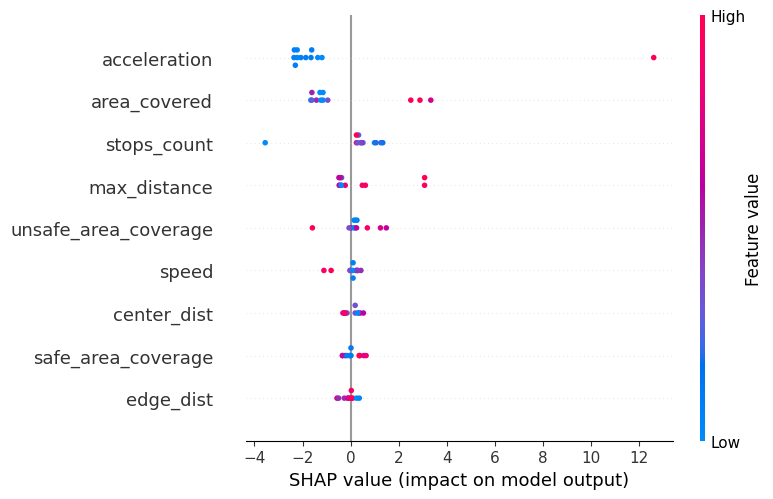


SHAP Summary Plot for: 10s_10s


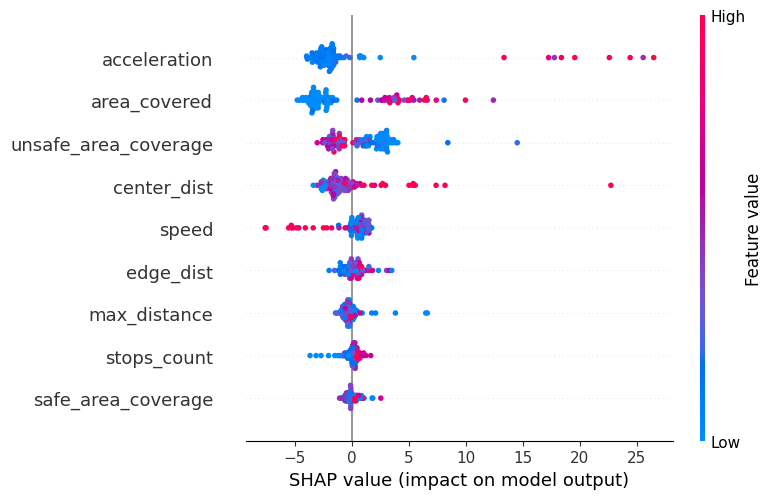


SHAP Summary Plot for: 10s_1s


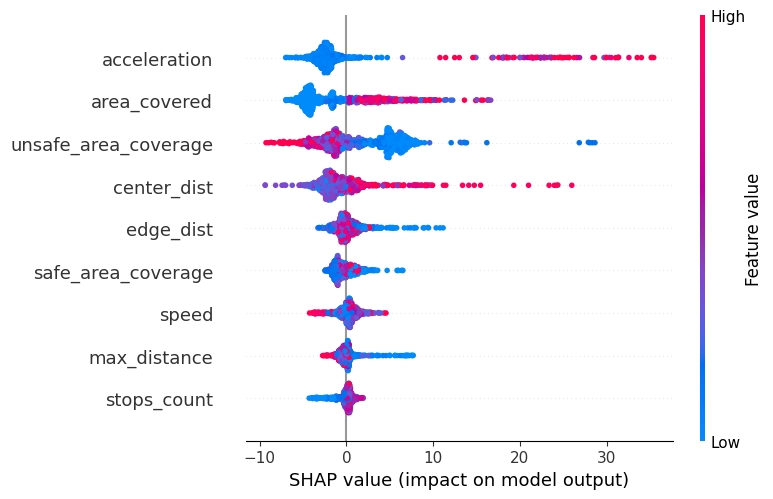


SHAP Summary Plot for: 20s_1s


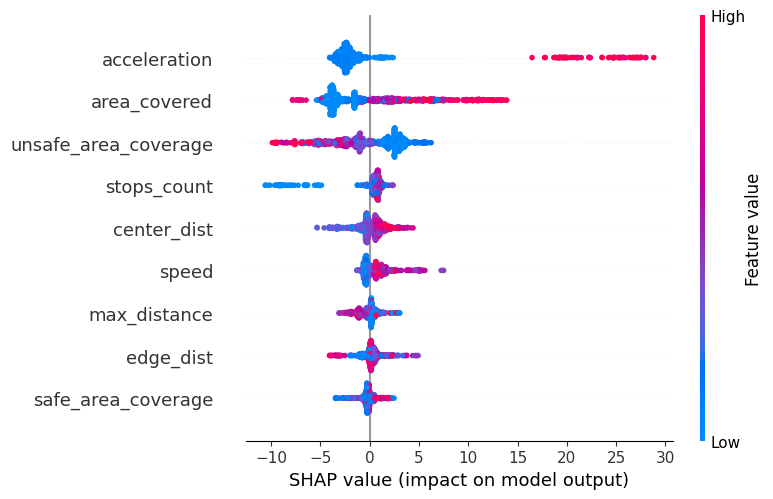


SHAP Summary Plot for: 30s_30s


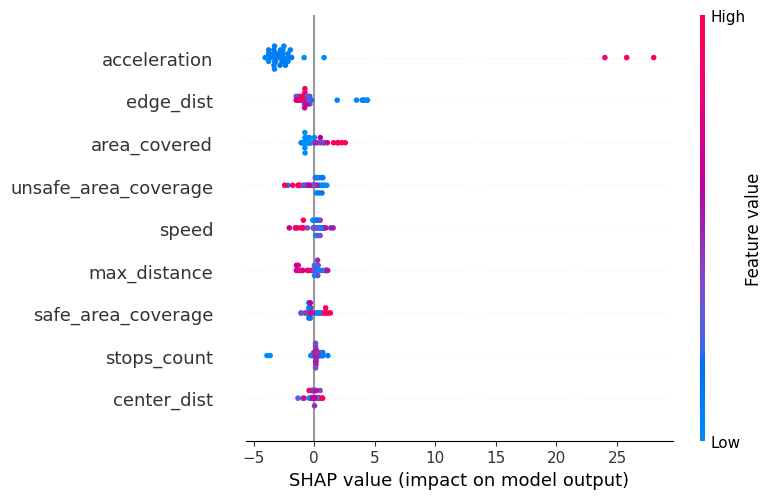


SHAP Summary Plot for: 30s_1s


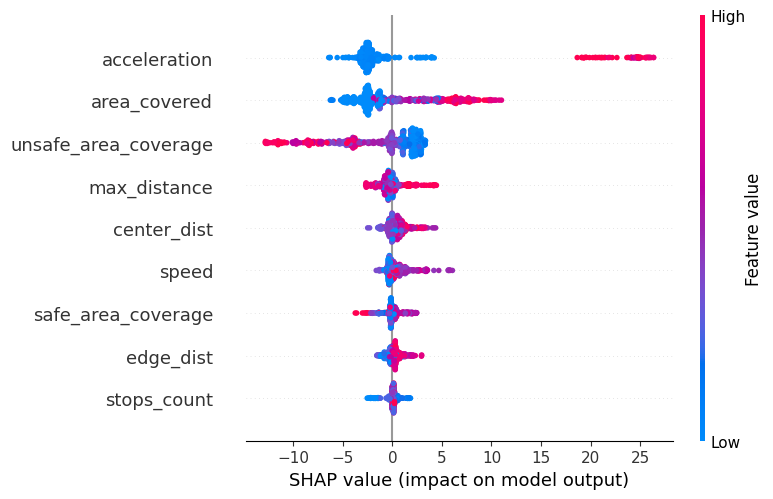


SHAP Summary Plot for: 20s_10s


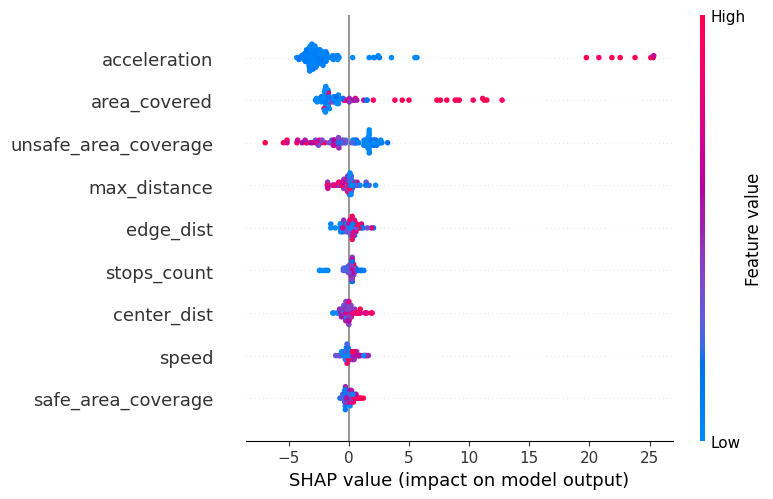


SHAP Summary Plot for: 60s_1s


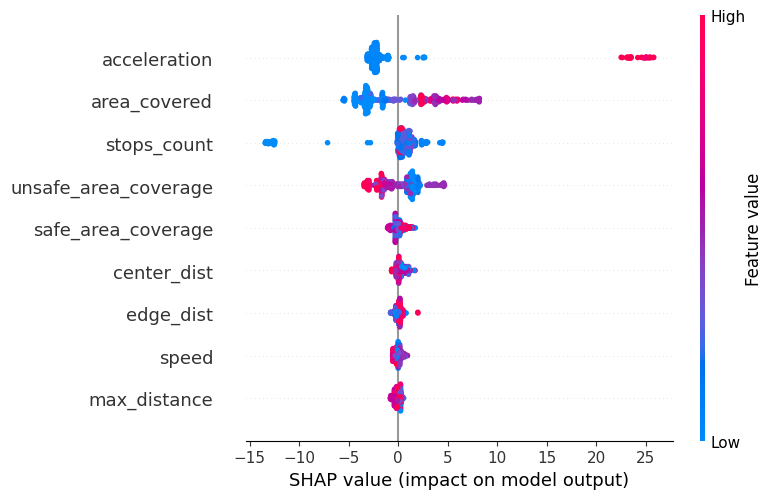

In [12]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode scene and segmentation (you can skip using them if not needed)
df_all['scene_enc'] = LabelEncoder().fit_transform(df_all['scene'])
df_all['segmentation_enc'] = LabelEncoder().fit_transform(df_all['segmentation'])

features = ['speed', 'acceleration', 'stops_count', 'area_covered',            
            'center_dist', 'edge_dist', 'max_distance',
            'safe_area_coverage', 'unsafe_area_coverage']

target = 'rmssd'

for segment in df_all['segmentation'].unique():
    df_segment = df_all[df_all['segmentation'] == segment].dropna(subset=features + [target])

    # Fit random forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(df_segment[features], df_segment[target])
    
    # Feature importances (baseline/global)
    #importances = pd.Series(rf.feature_importances_, index=features)
    #print(f"\n{segment} - Feature Importances:")
    #print(importances.sort_values(ascending=False))

    # SHAP explainer and values
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(df_segment[features])

    # SHAP summary plot
    print(f"\nSHAP Summary Plot for: {segment}")
    shap.summary_plot(shap_values, df_segment[features])


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_all['scene_enc'] = LabelEncoder().fit_transform(df_all['scene'])
df_all['segmentation_enc'] = LabelEncoder().fit_transform(df_all['segmentation'])

features = ['speed', 'acceleration', 'stops_count', 'area_covered', 'center_dist', 'edge_dist', 'max_distance', 'scene_enc', 'segmentation_enc']
target = 'hr'

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_all[features], df_all[target])
importances = pd.Series(rf.feature_importances_, index=features)
print(importances.sort_values(ascending=False))

speed               0.273323
acceleration        0.236890
area_covered        0.114023
center_dist         0.101281
max_distance        0.099630
edge_dist           0.071907
stops_count         0.059185
scene_enc           0.035712
segmentation_enc    0.008048
dtype: float64


In [14]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import aic, bic
from sklearn.metrics import r2_score

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    X = df_seg[['speed', 'acceleration', 'stops_count', 'area_covered']].copy()
    X = sm.add_constant(X)
    y = df_seg['rmssd']
    model = sm.OLS(y, X).fit()
    pred = model.predict(X)
    r2 = r2_score(y, pred)
    results.append({
        'segmentation': seg,
        'R2': r2,
        'AIC': model.aic,
        'BIC': model.bic
    })
    print(f"{seg}: R2={r2:.3f}, AIC={model.aic:.1f}, BIC={model.bic:.1f}")

comparison_df = pd.DataFrame(results)
print(comparison_df)

90s_1s: R2=0.171, AIC=282.1, BIC=290.0
10s_10s: R2=0.062, AIC=2732.4, BIC=2751.3
10s_1s: R2=0.070, AIC=24650.3, BIC=24680.2
20s_1s: R2=0.093, AIC=20338.9, BIC=20368.1
30s_30s: R2=0.108, AIC=855.4, BIC=868.9
30s_1s: R2=0.102, AIC=17205.4, BIC=17233.9
20s_10s: R2=0.093, AIC=2302.2, BIC=2320.5
60s_1s: R2=0.136, AIC=8571.1, BIC=8596.2
  segmentation        R2           AIC           BIC
0       90s_1s  0.170957    282.103879    290.021474
1      10s_10s  0.061988   2732.433487   2751.337205
2       10s_1s  0.069727  24650.319739  24680.209579
3       20s_1s  0.092860  20338.897740  20368.128734
4      30s_30s  0.107886    855.445799    868.856455
5       30s_1s  0.101565  17205.434347  17233.906311
6      20s_10s  0.092844   2302.217753   2320.532555
7       60s_1s  0.136072   8571.068246   8596.155777


In [15]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue  # skip if too few data points to fit model
        
        X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered']].copy()
        X = sm.add_constant(X)
        y = df_sub['rmssd']
        
        model = sm.OLS(y, X).fit()
        pred = model.predict(X)
        r2 = r2_score(y, pred)
        
        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2': r2,
            'AIC': model.aic,
            'BIC': model.bic
        })

        print(f"{seg} | {scene}: R2={r2:.3f}, AIC={model.aic:.1f}, BIC={model.bic:.1f}")

comparison_df = pd.DataFrame(results)
print(comparison_df)


90s_1s | empty_room: R2=0.470, AIC=96.4, BIC=98.8
90s_1s | elevated_platform: R2=0.752, AIC=83.8, BIC=86.3
90s_1s | dark_maze: R2=0.305, AIC=99.6, BIC=102.0
10s_10s | empty_room: R2=0.165, AIC=912.8, BIC=926.3
10s_10s | elevated_platform: R2=0.204, AIC=881.7, BIC=895.2
10s_10s | dark_maze: R2=0.102, AIC=920.8, BIC=934.2
10s_1s | empty_room: R2=0.182, AIC=8187.7, BIC=8212.1
10s_1s | elevated_platform: R2=0.233, AIC=7829.0, BIC=7853.4
10s_1s | dark_maze: R2=0.116, AIC=8262.4, BIC=8286.8
20s_1s | empty_room: R2=0.171, AIC=6826.3, BIC=6850.0
20s_1s | elevated_platform: R2=0.398, AIC=6138.9, BIC=6162.6
20s_1s | dark_maze: R2=0.195, AIC=6802.2, BIC=6825.9
30s_30s | empty_room: R2=0.212, AIC=291.2, BIC=299.1
30s_30s | elevated_platform: R2=0.606, AIC=253.1, BIC=261.1
30s_30s | dark_maze: R2=0.231, AIC=290.3, BIC=298.2
30s_1s | empty_room: R2=0.190, AIC=5763.7, BIC=5786.7
30s_1s | elevated_platform: R2=0.441, AIC=5148.8, BIC=5171.8
30s_1s | dark_maze: R2=0.224, AIC=5732.1, BIC=5755.1
20s_10s |

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import LeaveOneGroupOut
import pandas as pd
import numpy as np
import warnings

# Suppress the specific warnings about R² for single samples
warnings.filterwarnings("ignore", message="R^2 score is not well-defined with less than two samples.")

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue
        
        # Check if we have at least 2 participants for cross-validation
        n_participants = df_sub['participant_id'].nunique()
        if n_participants < 2:
            print(f"Skipping {seg} | {scene}: Only one participant available")
            continue
            
        X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered', 'edge_dist', 'center_dist', 'max_distance']].copy()
        y = df_sub['rmssd'].values
        groups = df_sub['participant_id'].values  # Participant IDs for grouping

        # In-sample Random Forest model
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X, y)
        y_pred_in = rf.predict(X)
        r2_in_sample = r2_score(y, y_pred_in)

        # Leave-One-Group-Out CV (using participants as groups)
        logo = LeaveOneGroupOut()
        y_true, y_pred = [], []
        participant_errors = {}

        for train_idx, test_idx in logo.split(X, y, groups):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            rf_cv = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_cv.fit(X_train, y_train)
            fold_preds = rf_cv.predict(X_test)
            
            # Append all predictions from this participant
            y_pred.extend(fold_preds)
            y_true.extend(y_test)
            
            # Track error for this participant
            test_participant = groups[test_idx[0]]
            participant_errors[test_participant] = abs(y_test[0] - fold_preds[0])
            
            #print(f"  Testing on participant {test_participant}, absolute error: {participant_errors[test_participant]:.3f}")

        # Calculate overall R² across all test predictions
        r2_logo = r2_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)

        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2_in_sample': r2_in_sample,
            'R2_LOGO': r2_logo,  # Overall Leave-One-Participant-Out R²
            'MAE': mae,
            'participants': n_participants
        })

        print(f"{seg} | {scene}: R2={r2_in_sample:.3f}, Leave-One-Participant-Out R2={r2_logo:.3f}, MAE={mae:.3f}, Participants={n_participants}")

comparison_df = pd.DataFrame(results)
print(comparison_df)

90s_1s | empty_room: R2=0.823, Leave-One-Participant-Out R2=-0.340, MAE=9.607, Participants=12
90s_1s | elevated_platform: R2=0.848, Leave-One-Participant-Out R2=-0.217, MAE=8.110, Participants=12
90s_1s | dark_maze: R2=0.865, Leave-One-Participant-Out R2=-0.017, MAE=8.086, Participants=12
10s_10s | empty_room: R2=0.875, Leave-One-Participant-Out R2=-1.085, MAE=16.047, Participants=12
10s_10s | elevated_platform: R2=0.877, Leave-One-Participant-Out R2=-0.281, MAE=11.577, Participants=12
10s_10s | dark_maze: R2=0.843, Leave-One-Participant-Out R2=-0.727, MAE=14.787, Participants=12
10s_1s | empty_room: R2=0.960, Leave-One-Participant-Out R2=-1.084, MAE=17.044, Participants=12
10s_1s | elevated_platform: R2=0.964, Leave-One-Participant-Out R2=-0.360, MAE=12.852, Participants=12
10s_1s | dark_maze: R2=0.948, Leave-One-Participant-Out R2=-0.686, MAE=15.586, Participants=12
20s_1s | empty_room: R2=0.986, Leave-One-Participant-Out R2=-1.938, MAE=15.628, Participants=12
20s_1s | elevated_plat

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import LeaveOneGroupOut
import pandas as pd
import numpy as np
import warnings

# Suppress R² warnings for small samples
warnings.filterwarnings("ignore", message="R^2 score is not well-defined with less than two samples.")

# Manual R² function
def r2_score_manual(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot) if ss_tot != 0 else float('nan')

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue
        
        n_participants = df_sub['participant_id'].nunique()
        if n_participants < 2:
            print(f"Skipping {seg} | {scene}: Only one participant available")
            continue
            
        X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered', 'edge_dist', 'center_dist', 'max_distance']].copy()
        y = df_sub['rmssd'].values
        groups = df_sub['participant_id'].values

        # In-sample model
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X, y)
        y_pred_in = rf.predict(X)
        r2_in_sample_manual = r2_score_manual(y, y_pred_in)
        r2_in_sample_sklearn = r2_score(y, y_pred_in)

        # Leave-One-Group-Out CV
        logo = LeaveOneGroupOut()
        y_true, y_pred = [], []
        participant_errors = {}

        for train_idx, test_idx in logo.split(X, y, groups):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            rf_cv = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_cv.fit(X_train, y_train)
            fold_preds = rf_cv.predict(X_test)
            
            y_pred.extend(fold_preds)
            y_true.extend(y_test)
            
            test_participant = groups[test_idx[0]]
            participant_errors[test_participant] = abs(y_test[0] - fold_preds[0])
            
            #print(f"  Testing on participant {test_participant}, absolute error: {participant_errors[test_participant]:.3f}")

        r2_logo_manual = r2_score_manual(y_true, y_pred)
        r2_logo_sklearn = r2_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)

        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2_in_sample_manual': r2_in_sample_manual,
            'R2_in_sample_sklearn': r2_in_sample_sklearn,
            'R2_LOGO_manual': r2_logo_manual,
            'R2_LOGO_sklearn': r2_logo_sklearn,
            'MAE': mae,
            'participants': n_participants
        })

        print(f"{seg} | {scene}: In-sample R2: manual={r2_in_sample_manual:.3f}, sklearn={r2_in_sample_sklearn:.3f} | "
              f"LOGO R2: manual={r2_logo_manual:.3f}, sklearn={r2_logo_sklearn:.3f} | MAE={mae:.3f} | Participants={n_participants}")

comparison_df = pd.DataFrame(results)
print(comparison_df)


TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(5)` instead.

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
import pandas as pd

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue  # Skip if too few data points
        
        X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered', 'edge_dist', 'center_dist', 'max_distance']].copy()
        #X=df_sub[['acceleration', 'stops_count', 'area_covered']].copy()
        X = sm.add_constant(X)
        y = df_sub['rmssd']

        # In-sample model
        model = sm.OLS(y, X).fit()
        pred = model.predict(X)
        r2 = r2_score(y, pred)

        # LOOCV
        X_loocv = X.values
        y_loocv = y.values.ravel()
        loo = LeaveOneOut()
        y_true, y_pred = [], []

        for train_idx, test_idx in loo.split(X_loocv):
            X_train, X_test = X_loocv[train_idx], X_loocv[test_idx]
            y_train, y_test = y_loocv[train_idx], y_loocv[test_idx]
            reg = LinearRegression().fit(X_train, y_train)
            y_pred.append(reg.predict(X_test)[0])
            y_true.append(y_test[0])

        r2_loocv = r2_score(y_true, y_pred)

        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2_in_sample': r2,
            'R2_LOOCV': r2_loocv,
            'AIC': model.aic,
            'BIC': model.bic
        })

        print(f"{seg} | {scene}: R2={r2:.3f}, LOOCV R2={r2_loocv:.3f}, AIC={model.aic:.1f}, BIC={model.bic:.1f}")

comparison_df = pd.DataFrame(results)
print(comparison_df)


90s_1s | empty_room: R2=0.719, LOOCV R2=-22.136, AIC=94.7, BIC=98.6
90s_1s | elevated_platform: R2=0.952, LOOCV R2=-0.875, AIC=70.2, BIC=74.1
90s_1s | dark_maze: R2=0.560, LOOCV R2=-29.541, AIC=100.1, BIC=104.0
10s_10s | empty_room: R2=0.176, LOOCV R2=-0.035, AIC=917.4, BIC=938.9
10s_10s | elevated_platform: R2=0.228, LOOCV R2=0.020, AIC=884.4, BIC=905.9
10s_10s | dark_maze: R2=0.109, LOOCV R2=-0.034, AIC=925.9, BIC=947.3
10s_1s | empty_room: R2=0.190, LOOCV R2=0.175, AIC=8183.9, BIC=8223.0
10s_1s | elevated_platform: R2=0.252, LOOCV R2=0.238, AIC=7810.3, BIC=7849.4
10s_1s | dark_maze: R2=0.123, LOOCV R2=0.108, AIC=8261.1, BIC=8300.2
20s_1s | empty_room: R2=0.199, LOOCV R2=0.184, AIC=6803.4, BIC=6841.4
20s_1s | elevated_platform: R2=0.400, LOOCV R2=0.387, AIC=6142.4, BIC=6180.4
20s_1s | dark_maze: R2=0.198, LOOCV R2=0.183, AIC=6804.1, BIC=6842.1
30s_30s | empty_room: R2=0.276, LOOCV R2=-0.266, AIC=294.2, BIC=306.9
30s_30s | elevated_platform: R2=0.625, LOOCV R2=0.350, AIC=257.4, BIC=27

In [38]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
import pandas as pd
import numpy as np

def r2_score_manual(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue  # Skip if too few data points
        
        X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered', 'edge_dist', 'center_dist', 'max_distance']].copy()
        X = sm.add_constant(X)
        y = df_sub['rmssd']

        # In-sample model
        model = sm.OLS(y, X).fit()
        pred = model.predict(X)
        r2 = r2_score_manual(y, pred)

        # LOOCV
        X_loocv = X.values
        y_loocv = y.values.ravel()
        loo = LeaveOneOut()
        y_true, y_pred = [], []

        for train_idx, test_idx in loo.split(X_loocv):
            X_train, X_test = X_loocv[train_idx], X_loocv[test_idx]
            y_train, y_test = y_loocv[train_idx], y_loocv[test_idx]
            reg = LinearRegression().fit(X_train, y_train)
            y_pred.append(reg.predict(X_test)[0])
            y_true.append(y_test[0])

        r2_loocv = r2_score_manual(y_true, y_pred)

        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2_in_sample': r2,
            'R2_LOOCV': r2_loocv,
            'AIC': model.aic,
            'BIC': model.bic
        })

        print(f"{seg} | {scene}: R2={r2:.3f}, LOOCV R2 manual={r2_loocv:.3f}, AIC={model.aic:.1f}, BIC={model.bic:.1f}")

comparison_df = pd.DataFrame(results)
print(comparison_df)


90s_1s | empty_room: R2=0.719, LOOCV R2 manual=-22.136, AIC=94.7, BIC=98.6
90s_1s | elevated_platform: R2=0.952, LOOCV R2 manual=-0.875, AIC=70.2, BIC=74.1
90s_1s | dark_maze: R2=0.560, LOOCV R2 manual=-29.541, AIC=100.1, BIC=104.0
10s_10s | empty_room: R2=0.176, LOOCV R2 manual=-0.035, AIC=917.4, BIC=938.9
10s_10s | elevated_platform: R2=0.228, LOOCV R2 manual=0.020, AIC=884.4, BIC=905.9
10s_10s | dark_maze: R2=0.109, LOOCV R2 manual=-0.034, AIC=925.9, BIC=947.3
10s_1s | empty_room: R2=0.190, LOOCV R2 manual=0.175, AIC=8183.9, BIC=8223.0
10s_1s | elevated_platform: R2=0.252, LOOCV R2 manual=0.238, AIC=7810.3, BIC=7849.4
10s_1s | dark_maze: R2=0.123, LOOCV R2 manual=0.108, AIC=8261.1, BIC=8300.2
20s_1s | empty_room: R2=0.199, LOOCV R2 manual=0.184, AIC=6803.4, BIC=6841.4
20s_1s | elevated_platform: R2=0.400, LOOCV R2 manual=0.387, AIC=6142.4, BIC=6180.4
20s_1s | dark_maze: R2=0.198, LOOCV R2 manual=0.183, AIC=6804.1, BIC=6842.1
30s_30s | empty_room: R2=0.276, LOOCV R2 manual=-0.266, AI

In [45]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GroupKFold
import pandas as pd
import numpy as np

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue  # Skip if too few data points

        X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered', 'edge_dist', 'center_dist', 'max_distance']].copy()
        X = sm.add_constant(X)
        y = df_sub['rmssd']
        groups = df_sub['participant_id']  # group variable

        # In-sample model
        model = sm.OLS(y, X).fit()
        pred = model.predict(X)
        r2 = r2_score(y, pred)

        # GroupKFold CV
        gkf = GroupKFold(n_splits=12)
        y_true, y_pred = [], []

        for train_idx, test_idx in gkf.split(X, y, groups):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            reg = LinearRegression().fit(X_train, y_train)
            y_pred.extend(reg.predict(X_test))
            y_true.extend(y_test)

        r2_groupcv = r2_score(y_true, y_pred)

        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2_in_sample': r2,
            'R2_GroupCV': r2_groupcv,
            'AIC': model.aic,
            'BIC': model.bic
        })

        print(f"{seg} | {scene}: R2={r2:.3f}, GroupCV R2={r2_groupcv:.3f}, AIC={model.aic:.1f}, BIC={model.bic:.1f}")

comparison_df = pd.DataFrame(results)
print(comparison_df)


90s_1s | empty_room: R2=0.719, GroupCV R2=-22.136, AIC=94.7, BIC=98.6
90s_1s | elevated_platform: R2=0.952, GroupCV R2=-0.875, AIC=70.2, BIC=74.1
90s_1s | dark_maze: R2=0.560, GroupCV R2=-29.541, AIC=100.1, BIC=104.0
10s_10s | empty_room: R2=0.176, GroupCV R2=-2.243, AIC=917.4, BIC=938.9
10s_10s | elevated_platform: R2=0.228, GroupCV R2=-0.445, AIC=884.4, BIC=905.9
10s_10s | dark_maze: R2=0.109, GroupCV R2=-0.780, AIC=925.9, BIC=947.3
10s_1s | empty_room: R2=0.190, GroupCV R2=-1.986, AIC=8183.9, BIC=8223.0
10s_1s | elevated_platform: R2=0.252, GroupCV R2=-0.151, AIC=7810.3, BIC=7849.4
10s_1s | dark_maze: R2=0.123, GroupCV R2=-0.727, AIC=8261.1, BIC=8300.2
20s_1s | empty_room: R2=0.199, GroupCV R2=-4.500, AIC=6803.4, BIC=6841.4
20s_1s | elevated_platform: R2=0.400, GroupCV R2=-1.003, AIC=6142.4, BIC=6180.4
20s_1s | dark_maze: R2=0.198, GroupCV R2=-1.181, AIC=6804.1, BIC=6842.1
30s_30s | empty_room: R2=0.276, GroupCV R2=-4.249, AIC=294.2, BIC=306.9
30s_30s | elevated_platform: R2=0.625, 

In [34]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
import pandas as pd

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue
        
        X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered', 'edge_dist', 'center_dist', 'max_distance']].copy()
        y = df_sub['rmssd'].values

        # In-sample Random Forest model
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X, y)
        y_pred_in = rf.predict(X)
        r2_in_sample = r2_score(y, y_pred_in)

        # LOOCV
        loo = LeaveOneOut()
        y_true, y_pred = [], []

        for train_idx, test_idx in loo.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            rf_cv = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_cv.fit(X_train, y_train)
            y_pred.append(rf_cv.predict(X_test)[0])
            y_true.append(y_test[0])

        r2_loocv = r2_score(y_true, y_pred)

        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2_in_sample': r2_in_sample,
            'R2_LOOCV': r2_loocv,
            'AIC': None,  # Not available for non-parametric models
            'BIC': None
        })

        print(f"{seg} | {scene}: R2={r2_in_sample:.3f}, LOOCV R2={r2_loocv:.3f}")

comparison_df = pd.DataFrame(results)
print(comparison_df)

90s_1s | empty_room: R2=0.797, LOOCV R2=-0.378
90s_1s | elevated_platform: R2=0.854, LOOCV R2=-0.253
90s_1s | dark_maze: R2=0.869, LOOCV R2=-0.050
10s_10s | empty_room: R2=0.874, LOOCV R2=0.057
10s_10s | elevated_platform: R2=0.875, LOOCV R2=-0.037
10s_10s | dark_maze: R2=0.844, LOOCV R2=-0.240
10s_1s | empty_room: R2=0.960, LOOCV R2=0.722


KeyboardInterrupt: 

In [19]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

results = []

# Elastic Net parameters
alpha = 0.1  # Overall regularization strength
l1_ratio = 0.5  # Mix between L1 and L2 (0.5 = equal mix)

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue  # Skip if too few data points
        
        X = df_sub[['speed','acceleration', 'stops_count', 'area_covered']].copy()
        X_with_const = sm.add_constant(X)  # For OLS
        y = df_sub['rmssd']

        # Scale features for Elastic Net (regularization works better with scaled features)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # In-sample OLS model
        model = sm.OLS(y, X_with_const).fit()
        pred = model.predict(X_with_const)
        r2 = r2_score(y, pred)

        # Elastic Net in-sample
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, random_state=42)
        elastic_model.fit(X_scaled, y)
        elastic_pred = elastic_model.predict(X_scaled)
        r2_elastic = r2_score(y, elastic_pred)

        # LOOCV for OLS
        X_loocv = X_with_const.values
        y_loocv = y.values.ravel()
        loo = LeaveOneOut()
        y_true, y_pred = [], []

        for train_idx, test_idx in loo.split(X_loocv):
            X_train, X_test = X_loocv[train_idx], X_loocv[test_idx]
            y_train, y_test = y_loocv[train_idx], y_loocv[test_idx]
            reg = LinearRegression().fit(X_train, y_train)
            y_pred.append(reg.predict(X_test)[0])
            y_true.append(y_test[0])

        r2_loocv = r2_score(y_true, y_pred)
        
        # LOOCV for Elastic Net
        X_scaled_loocv = X_scaled
        loo = LeaveOneOut()
        y_true_elastic, y_pred_elastic = [], []

        for train_idx, test_idx in loo.split(X_scaled_loocv):
            X_train, X_test = X_scaled_loocv[train_idx], X_scaled_loocv[test_idx]
            y_train, y_test = y_loocv[train_idx], y_loocv[test_idx]
            reg = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, random_state=42).fit(X_train, y_train)
            y_pred_elastic.append(reg.predict(X_test)[0])
            y_true_elastic.append(y_test[0])

        r2_loocv_elastic = r2_score(y_true_elastic, y_pred_elastic)

        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2_in_sample': r2,
            'R2_LOOCV': r2_loocv,
            'R2_ElasticNet': r2_elastic,
            'R2_ElasticNet_LOOCV': r2_loocv_elastic,
            'AIC': model.aic,
            'BIC': model.bic
        })

        print(f"{seg} | {scene}: OLS R2={r2:.3f}, LOOCV R2={r2_loocv:.3f}, ElasticNet R2={r2_elastic:.3f}, ElasticNet LOOCV R2={r2_loocv_elastic:.3f}, AIC={model.aic:.1f}, BIC={model.bic:.1f}")

comparison_df = pd.DataFrame(results)
print(comparison_df)

90s_1s | empty_room: OLS R2=0.470, LOOCV R2=-15.375, ElasticNet R2=0.467, ElasticNet LOOCV R2=-2.245, AIC=96.4, BIC=98.8
90s_1s | elevated_platform: OLS R2=0.752, LOOCV R2=-1.325, ElasticNet R2=0.748, ElasticNet LOOCV R2=-0.266, AIC=83.8, BIC=86.3
90s_1s | dark_maze: OLS R2=0.305, LOOCV R2=-2.775, ElasticNet R2=0.279, ElasticNet LOOCV R2=-1.723, AIC=99.6, BIC=102.0
10s_10s | empty_room: OLS R2=0.165, LOOCV R2=-0.015, ElasticNet R2=0.110, ElasticNet LOOCV R2=0.035, AIC=912.8, BIC=926.3
10s_10s | elevated_platform: OLS R2=0.204, LOOCV R2=0.033, ElasticNet R2=0.203, ElasticNet LOOCV R2=0.077, AIC=881.7, BIC=895.2
10s_10s | dark_maze: OLS R2=0.102, LOOCV R2=0.021, ElasticNet R2=0.100, ElasticNet LOOCV R2=0.033, AIC=920.8, BIC=934.2
10s_1s | empty_room: OLS R2=0.182, LOOCV R2=0.170, ElasticNet R2=0.129, ElasticNet LOOCV R2=0.122, AIC=8187.7, BIC=8212.1
10s_1s | elevated_platform: OLS R2=0.233, LOOCV R2=0.224, ElasticNet R2=0.231, ElasticNet LOOCV R2=0.224, AIC=7829.0, BIC=7853.4
10s_1s | da

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Filter your specific group (example: 90s_1s | empty_room)
df_sub = df_all[(df_all['segmentation'] == '90s_1s') & (df_all['scene'] == 'empty_room')]

# Prepare design matrix
X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered']].copy()
X = sm.add_constant(X)

# Compute VIF for each column
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



        feature        VIF
0         const  49.057730
1         speed  10.731037
2  acceleration   2.031850
3   stops_count   2.616556
4  area_covered   6.463370


In [21]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_loocv = X.values
y_loocv = y.values.ravel()

loo = LeaveOneOut()
y_true, y_pred = [], []

for train_index, test_index in loo.split(X_loocv):
    X_train, X_test = X_loocv[train_index], X_loocv[test_index]
    y_train, y_test = y_loocv[train_index], y_loocv[test_index]
    model = LinearRegression().fit(X_train, y_train)
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])

r2_loocv = r2_score(y_true, y_pred)
print(f"LOOCV R²: {r2_loocv:.3f}")


LOOCV R²: -0.943


In [22]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

results = []

for seg in df_all['segmentation'].unique():
    df_seg = df_all[df_all['segmentation'] == seg]
    
    for scene in df_seg['scene'].unique():
        df_sub = df_seg[df_seg['scene'] == scene]
        
        if len(df_sub) < 5:
            continue  # skip if too few data points to fit model
        
        X = df_sub[['speed', 'acceleration', 'stops_count', 'area_covered']].copy()
        X = sm.add_constant(X)
        y = df_sub['hr']
        
        model = sm.OLS(y, X).fit()
        pred = model.predict(X)
        r2 = r2_score(y, pred)
        
        results.append({
            'segmentation': seg,
            'scene': scene,
            'R2': r2,
            'AIC': model.aic,
            'BIC': model.bic
        })

        print(f"{seg} | {scene}: R2={r2:.3f}, AIC={model.aic:.1f}, BIC={model.bic:.1f}")

comparison_df = pd.DataFrame(results)
print(comparison_df)


90s_1s | empty_room: R2=0.871, AIC=82.3, BIC=84.8
90s_1s | elevated_platform: R2=0.445, AIC=98.9, BIC=101.3
90s_1s | dark_maze: R2=0.395, AIC=100.9, BIC=103.3
10s_10s | empty_room: R2=0.235, AIC=866.9, BIC=880.3
10s_10s | elevated_platform: R2=0.228, AIC=858.0, BIC=871.4
10s_10s | dark_maze: R2=0.150, AIC=878.2, BIC=891.6
10s_1s | empty_room: R2=0.276, AIC=7653.2, BIC=7677.6
10s_1s | elevated_platform: R2=0.243, AIC=7622.2, BIC=7646.6
10s_1s | dark_maze: R2=0.162, AIC=7794.7, BIC=7819.1
20s_1s | empty_room: R2=0.344, AIC=6604.7, BIC=6628.5
20s_1s | elevated_platform: R2=0.280, AIC=6607.7, BIC=6631.4
20s_1s | dark_maze: R2=0.221, AIC=6750.9, BIC=6774.7
30s_30s | empty_room: R2=0.402, AIC=284.3, BIC=292.2
30s_30s | elevated_platform: R2=0.337, AIC=284.6, BIC=292.5
30s_30s | dark_maze: R2=0.198, AIC=294.9, BIC=302.8
30s_1s | empty_room: R2=0.450, AIC=5530.6, BIC=5553.5
30s_1s | elevated_platform: R2=0.298, AIC=5642.8, BIC=5665.8
30s_1s | dark_maze: R2=0.270, AIC=5737.0, BIC=5760.0
20s_10s

In [23]:
# Build design matrix with interaction
y, X = patsy.dmatrices('rmssd ~ speed * scene + stops_count * scene + area_covered * scene',
                       data=df_all, return_type='dataframe')
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  rmssd   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     32.70
Date:                Sat, 10 May 2025   Prob (F-statistic):           5.11e-69
Time:                        14:32:16   Log-Likelihood:                -38896.
No. Observations:                9540   AIC:                         7.782e+04
Df Residuals:                    9528   BIC:                         7.790e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [24]:
for scene in df_all['scene'].unique():
    df_scene = df_all[df_all['scene'] == scene]
    X = df_scene[['speed', 'acceleration', 'stops_count', 'area_covered']].copy()
    X = sm.add_constant(X)
    y = df_scene['rmssd']
    model = sm.OLS(y, X).fit()
    print(f"Scene: {scene}")
    print(model.summary())
    print('-' * 60)

Scene: empty_room
                            OLS Regression Results                            
Dep. Variable:                  rmssd   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     134.6
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.43e-106
Time:                        14:32:16   Log-Likelihood:                -12955.
No. Observations:                3180   AIC:                         2.592e+04
Df Residuals:                    3175   BIC:                         2.595e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.4505      0